This notebook is based on the notebook format from the youtube series by Jonathan Soma "Introduction to geopandas"

The data within this notebook is from the City of Torontos Open Data set.

In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon

#see all columns when calling head on a dataframe
pd.set_option('display.max_columns', None)

from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#Tell matplot lib to generate plots inline, within the notebook
%matplotlib inline

<Axes: >

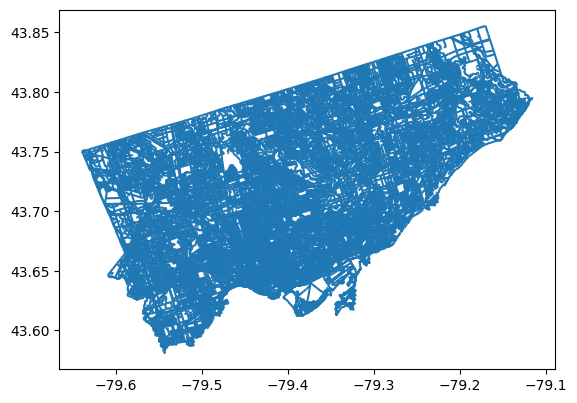

In [35]:
shape_path = "/workspace/GIS_project/data/Centreline - Version 2 - 4326/Centreline - Version 2 - 4326.shp"
centreline = gpd.read_file(shape_path)
centreline.plot()

In [36]:
centreline.head()

,_id1,CENTREL2,LINEAR_3,LINEAR_4,LINEAR_5,ADDRESS6,ADDRESS7,PARITY_8,PARITY_9,LO_NUM_10,HI_NUM_11,LO_NUM_12,HI_NUM_13,BEGIN_A14,END_ADD15,BEGIN_A16,END_ADD17,BEGIN_A18,END_ADD19,BEGIN_A20,END_ADD21,LOW_NUM22,HIGH_NU23,LOW_NUM24,HIGH_NU25,LINEAR_26,LINEAR_27,LINEAR_28,LINEAR_29,LINEAR_30,FROM_IN31,TO_INTE32,ONEWAY_33,ONEWAY_34,FEATURE35,FEATURE36,JURISDI37,CENTREL38,OBJECTI39,MI_PRIN40,geometry
0,1,914600,2141,Morrison St,Morrison Street,None,None,N,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Morrison,St,None,ET,Morrison St,13470555,13470560,0,Not One-Way,201500,Local,CITY OF TORONTO,None,1,1,"LINESTRING (-79.50875 43.59744, -79.50987 43.5..."
1,2,914601,2666,Twelfth St,Twelfth Street,66-92,65-89,E,O,66,92,65,89,1040061,1040085,1040060,1040082,66,92,65,89,65,89,66,92,Twelfth,St,None,None,Twelfth St,13470560,13470530,0,Not One-Way,201500,Local,CITY OF TORONTO,None,2,2,"LINESTRING (-79.50987 43.5972, -79.51035 43.59..."
2,3,7862398,2611,Thirteenth St,Thirteenth Street,66-96,65-91,E,O,66,96,65,91,7862400,7862422,7862399,7862415,66,96,65,91,65,91,66,96,Thirteenth,St,None,None,Thirteenth St,13470571,13470538,0,Not One-Way,201500,Local,CITY OF TORONTO,None,3,3,"LINESTRING (-79.51087 43.59697, -79.51134 43.5..."
3,4,914587,1962,Lake Shore Blvd W,Lake Shore Boulevard West,None,3180-3180,N,E,0,0,3180,3180,0,0,1013460,1013460,0,0,3180,3180,0,0,3180,3180,Lake Shore,Blvd,W,None,Lake Shore Blvd W,13470546,13470552,0,Not One-Way,201200,Major Arterial,CITY OF TORONTO,None,6,6,"LINESTRING (-79.51805 43.59795, -79.51914 43.5..."
4,5,6735911,1962,Lake Shore Blvd W,Lake Shore Boulevard West,3197-3197,3190-3190,O,E,3197,3197,3190,3190,6735910,6735910,6735913,6735913,3197,3197,3190,3190,3197,3197,3190,3190,Lake Shore,Blvd,W,None,Lake Shore Blvd W,13470552,13470558,0,Not One-Way,201200,Major Arterial,CITY OF TORONTO,None,7,7,"LINESTRING (-79.51914 43.5977, -79.52024 43.59..."


In [37]:
#We only want non motorway roads. So find feature types, and select the ones we want
centreline.FEATURE36.unique()


array(['Local', 'Major Arterial', 'River', 'Geostatistical line',
       'Major Shoreline', 'Collector', 'Minor Arterial', 'Major Railway',
       'Expressway', 'Laneway', 'Expressway Ramp', 'Pending',
       'Major Arterial Ramp', 'Other', 'Hydro Line', 'Walkway',
       'Minor Shoreline (Land locked)', 'Minor Railway', 'Trail',
       'Creek/Tributary', 'Collector Ramp', 'Busway', 'Ferry Route',
       'Access Road', 'Other Ramp', 'Minor Arterial Ramp'], dtype=object)

In [42]:
road_list = ['Local', 'Major Arterial', 'Major Arterial Ramp', 'Collector', 'Collector Ramp', 'Minor Arterial', 'Minor Arterial Ramp']
roads = centreline.query('FEATURE36 in @road_list')
roads = roads[['CENTREL2', 'LINEAR_3', 'LINEAR_4','LINEAR_5', 'LINEAR_26',
                'LINEAR_26', 'LINEAR_30', 'FROM_IN31', 'TO_INTE32', 'FEATURE35',
                'FEATURE36', 'JURISDI37', 'OBJECTI39', 'MI_PRIN40', 'geometry']]
roads.head()

,CENTREL2,LINEAR_3,LINEAR_4,LINEAR_5,LINEAR_26,LINEAR_26,LINEAR_30,FROM_IN31,TO_INTE32,FEATURE35,FEATURE36,JURISDI37,OBJECTI39,MI_PRIN40,geometry
0,914600,2141,Morrison St,Morrison Street,Morrison,Morrison,Morrison St,13470555,13470560,201500,Local,CITY OF TORONTO,1,1,"LINESTRING (-79.50875 43.59744, -79.50987 43.5..."
1,914601,2666,Twelfth St,Twelfth Street,Twelfth,Twelfth,Twelfth St,13470560,13470530,201500,Local,CITY OF TORONTO,2,2,"LINESTRING (-79.50987 43.5972, -79.51035 43.59..."
2,7862398,2611,Thirteenth St,Thirteenth Street,Thirteenth,Thirteenth,Thirteenth St,13470571,13470538,201500,Local,CITY OF TORONTO,3,3,"LINESTRING (-79.51087 43.59697, -79.51134 43.5..."
3,914587,1962,Lake Shore Blvd W,Lake Shore Boulevard West,Lake Shore,Lake Shore,Lake Shore Blvd W,13470546,13470552,201200,Major Arterial,CITY OF TORONTO,6,6,"LINESTRING (-79.51805 43.59795, -79.51914 43.5..."
4,6735911,1962,Lake Shore Blvd W,Lake Shore Boulevard West,Lake Shore,Lake Shore,Lake Shore Blvd W,13470552,13470558,201200,Major Arterial,CITY OF TORONTO,7,7,"LINESTRING (-79.51914 43.5977, -79.52024 43.59..."


In [ ]:
roads.plot()

In [21]:
#read shapefiles
file_path_1 = "/workspace/GIS_project/data/traffic/raw-data-2010-2019.csv"
file_path_2 = "/workspace/GIS_project/data/traffic/raw-data-2010-2019.csv"
file_path_3 = "/workspace/GIS_project/data/traffic/raw-data-2020-2029.csv"
#combine the csvs into a single dataframe
traffic = pd.concat(
    map(pd.read_csv, [file_path_1, file_path_2, file_path_3]), ignore_index=True)
#display head data
traffic.head()

,_id,count_id,count_date,location_id,location,lng,lat,centreline_type,centreline_id,px,time_start,time_end,sb_cars_r,sb_cars_t,sb_cars_l,nb_cars_r,nb_cars_t,nb_cars_l,wb_cars_r,wb_cars_t,wb_cars_l,eb_cars_r,eb_cars_t,eb_cars_l,sb_truck_r,sb_truck_t,sb_truck_l,nb_truck_r,nb_truck_t,nb_truck_l,wb_truck_r,wb_truck_t,wb_truck_l,eb_truck_r,eb_truck_t,eb_truck_l,sb_bus_r,sb_bus_t,sb_bus_l,nb_bus_r,nb_bus_t,nb_bus_l,wb_bus_r,wb_bus_t,wb_bus_l,eb_bus_r,eb_bus_t,eb_bus_l,nx_peds,sx_peds,ex_peds,wx_peds,nx_bike,sx_bike,ex_bike,wx_bike,nx_other,sx_other,ex_other,wx_other
0,1,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12T07:30:00,2010-01-12T07:45:00,8.0,0.0,1.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,31.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12T07:45:00,2010-01-12T08:00:00,8.0,0.0,4.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12T08:00:00,2010-01-12T08:15:00,4.0,0.0,5.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12T08:15:00,2010-01-12T08:30:00,12.0,0.0,3.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,37.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12T08:30:00,2010-01-12T08:45:00,11.0,0.0,2.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,30.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [25]:
#calculate new field that adds up all motor traffic
traffic['motortraf'] = traffic.loc[:,'sb_cars_r':'eb_bus_l'].sum(axis=1) + traffic.loc[:,'nx_other':'wx_other'].sum(axis=1)
#create a year field
traffic['year'] = pd.to_datetime(traffic['count_date']).dt.year

#new, cleaner, dataframe
traffic_trunc = traffic[['count_id', 'year', 'location_id', 'location', 'lng', 'lat', 'centreline_type', 'centreline_id', 'motortraf']]
traffic_trunc.head()

,count_id,year,location_id,location,lng,lat,centreline_type,centreline_id,motortraf
0,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,94.0
1,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,128.0
2,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,113.0
3,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,142.0
4,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,140.0


In [32]:
#aggregate and group by year and location id
traffic_agg = traffic_trunc.groupby(['year','location_id']).agg({'count_id': pd.Series.mode,
                                                              'location': pd.Series.mode,
                                                              'lng': pd.Series.mode, 'lat': pd.Series.mode,
                                                              'centreline_type':pd.Series.mode,
                                                              'centreline_id':pd.Series.mode,
                                                              'motortraf': 'sum'})
traffic_agg.head()

count_id                                      location  \
year location_id                                                          
2010 3938           26267  DON VALLEY PKWY AT WYNFORD DR WTCS (PX 1037)   
     3940           25879    BLACK CREEK DR AT LAWRENCE AVE W (PX 1348)   
     3946           25409                 BIRCHCLIFF AVE AT KINGSTON RD   
     3948           26099                    KINGSTON RD AT MIDLAND AVE   
     3949           26317                       CHINE DR AT KINGSTON RD   

                        lng        lat centreline_type centreline_id  \
year location_id                                                       
2010 3938        -79.330889  43.726667             2.0    13453914.0   
     3940        -79.494096  43.704950             2.0    13457600.0   
     3946        -79.264752  43.691480             2.0    13459344.0   
     3948        -79.248187  43.711121             2.0    13456025.0   
     3949        -79.245073  43.714114             2.0    13455525.0   

                  motortraf  
year location_id             
2010 3938           23870.0  
     3940           85808.0  
     3946           25126.0  
     3948           42026.0  
     3949           34842.0

In [34]:
#reset index so that we can use the data frame
traffic_agg = traffic_agg.reset_index()
traffic_agg.head(-5)

,index,year,location_id,count_id,location,lng,lat,centreline_type,centreline_id,motortraf
0,0,2010,3938,26267,DON VALLEY PKWY AT WYNFORD DR WTCS (PX 1037),-79.330889,43.726667,2.0,13453914.0,23870.0
1,1,2010,3940,25879,BLACK CREEK DR AT LAWRENCE AVE W (PX 1348),-79.494096,43.704950,2.0,13457600.0,85808.0
2,2,2010,3946,25409,BIRCHCLIFF AVE AT KINGSTON RD,-79.264752,43.691480,2.0,13459344.0,25126.0
3,3,2010,3948,26099,KINGSTON RD AT MIDLAND AVE,-79.248187,43.711121,2.0,13456025.0,42026.0
4,4,2010,3949,26317,CHINE DR AT KINGSTON RD,-79.245073,43.714114,2.0,13455525.0,34842.0
...,...,...,...,...,...,...,...,...,...,...
10062,10062,2024,51160,101526,Allenvale Ave / Lauder Ave,-79.445359,43.692544,2.0,13459620.0,656.0
10063,10063,2024,51161,101529,Oakwood Ave / Earlsdale Ave,-79.438091,43.685555,2.0,13460884.0,9187.0
10064,10064,2024,51231,101538,Brunswick Ave / Lowther Ave,-79.408303,43.668037,2.0,13463884.0,910.0
10065,10065,2024,51232,101541,Royal York Rd / Valiant Rd,-79.515116,43.655848,2.0,13466089.0,10564.0
